## Project Birds of Ireland

# Project Objectives:

To visualize the geographic distribution and concentration of bird populations across Ireland.

To develop an interactive map that enables users to explore bird concentration patterns spatially.

To implement filtering capabilities based on year, month, and bird species, allowing for flexible temporal and taxonomic analysis.

This analysis is based on bird observation data downloaded from the **Irish Spatial Data Exchange (ISDE)** on August 6, 2025.
https://www.isde.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.nbdc.dataset.BirdsOfIreland

The dataset covers the period from January 1, 1970, with the majority of records collected from 2011 onwards.

As the dataset is ongoing, this project is designed to be extensible and can be updated with new data in future releases.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
birds = pd.read_csv("BirdsOfIreland.csv", delimiter='\t')
birds.head()

<ipython-input-4-969c5018fb82>:1: DtypeWarning: Columns (0,1,12,16,17,18,20,21,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  birds = pd.read_csv("BirdsOfIreland.csv", delimiter='\t')


,SurveyKey,SampleKey,StartDate,EndDate,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,...,"Habitat code (Fossitt, 2000)",Type of sighting,Activity,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,13/07/2019,13/07/2019,D,13/07/2019,NBNSYS0000001346,Motacilla alba yarrellii,S8241,282500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,23/05/2020,23/05/2020,D,23/05/2020,NBNSYS0000001346,Motacilla alba yarrellii,O311082,331150.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,11/05/2021,11/05/2021,D,11/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.185258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,26/05/2021,26/05/2021,D,26/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.402222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,01/01/2021,01/01/2021,D,01/01/2021,NBNSYS0000001346,Motacilla alba yarrellii,N406445,240650.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
birds.shape

(278634, 40)

In [ ]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278634 entries, 0 to 278633
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SurveyKey                     22771 non-null   object 
 1   SampleKey                     12 non-null      object 
 2   StartDate                     278023 non-null  object 
 3   EndDate                       278011 non-null  object 
 4   DateType                      278003 non-null  object 
 5   Date                          278003 non-null  object 
 6   TaxonVersionKey               278015 non-null  object 
 7   TaxonName                     278011 non-null  object 
 8   GridReference                 172742 non-null  object 
 9   East                          278005 non-null  float64
 10  North                         278003 non-null  float64
 11  Projection                    278004 non-null  object 
 12  Precision                     278010 non-nul

### Data Preprocessing Notes:

During initial inspection of the dataset using LibreOffice Calc, several unnamed columns were identified. Upon further examination, it became evident that these columns likely resulted from text fields containing the CSV delimiter (commas) that were not properly enclosed in quotes during export.

These fragmented columns appeared to contain parts of the same textual field, specifically related to the "Activity" column. To address this, all unnamed columns were merged with the "Activity" column to reconstruct the complete text field and preserve the integrity of the original data.

This step ensures accurate parsing of the dataset and prevents loss of contextual information related to bird observation activities.

In [ ]:
cols_to_merge = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39']
for col in cols_to_merge:
    birds['Activity'] = birds['Activity'].fillna(birds[col])

birds = birds.drop(columns=cols_to_merge)

display(birds[['Activity']].head())

,Activity
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278634 entries, 0 to 278633
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SurveyKey                     22771 non-null   object 
 1   SampleKey                     12 non-null      object 
 2   StartDate                     278023 non-null  object 
 3   EndDate                       278011 non-null  object 
 4   DateType                      278003 non-null  object 
 5   Date                          278003 non-null  object 
 6   TaxonVersionKey               278015 non-null  object 
 7   TaxonName                     278011 non-null  object 
 8   GridReference                 172742 non-null  object 
 9   East                          278005 non-null  float64
 10  North                         278003 non-null  float64
 11  Projection                    278004 non-null  object 
 12  Precision                     278010 non-nul

**Date Field Validation and Imputation Strategy:**

The dataset contains two relevant temporal fields: date and startDate.

date has 278,003 non-null entries.

startDate has 278,023 non-null entries — 20 more than date.

To maximize the temporal coverage of the dataset, the 20 entries where startDate is available but date is null will be reviewed to determine if startDate can be reliably used as a proxy for date.

If confirmed consistent, these values will be imputed into the date field to enhance completeness and ensure uniformity for time-based filtering and analysis.

In [ ]:
display(birds[birds['Date'].isnull() & birds['StartDate'].notnull()])

,SurveyKey,SampleKey,StartDate,EndDate,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,...,Habitat description,Abundance,Determiner name,Survey name,Common name,Site description,Source,"Habitat code (Fossitt, 2000)",Type of sighting,Activity
55754,NaN,False,False,NaN,NaN,NaN,Mayo,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61441,NaN,False,False,NaN,NaN,NaN,Mayo,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66834,Ben Malone,NaN,False,False,NaN,NaN,NaN,Galway,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81735,Brendan McSherry,NaN,False,False,NaN,NaN,NaN,Donegal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81861,Brendan McSherry,NaN,False,False,NaN,NaN,NaN,Donegal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83148,Brendan McSherry,NaN,False,False,NaN,NaN,NaN,Donegal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86397,Brendan McSherry,NaN,False,False,NaN,NaN,NaN,Donegal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87502,Anthony Dawson,NaN,False,False,NaN,NaN,NaN,Galway,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87653,Brendan McSherry,NaN,False,False,NaN,NaN,NaN,Donegal,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138625,NaN,False,False,NaN,NaN,NaN,Laois,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The startDate field cannot be used to supplement missing values in the date field due to invalid content.

**Initial Feature Selection and Field Removal**

As part of the data preprocessing phase, an initial review of all fields was conducted to identify columns that can be removed due to irrelevance, redundancy, or poor data quality. The goal is to streamline the dataset for analysis and visualization by retaining only meaningful and reliable features.

**Criteria for Removal:**

Empty or Nearly Empty Fields: Columns with high proportions of null or placeholder values.

Duplicate or Redundant Fields: Columns that replicate information available elsewhere.

Corrupted or Invalid Data: Fields (e.g., startDate) containing non-informative or clearly erroneous values (e.g., "false").

Administrative or Irrelevant Metadata: Internal processing fields or identifiers not required for analysis (e.g., system-generated IDs, timestamps unrelated to observations).

Non-standardized Text Fragments: Unnamed or fragmented columns caused by CSV parsing issues (e.g., misplaced delimiters), which were addressed separately (e.g., merging into the Activity field).


In [ ]:
# I created a dataset to enhance the visualization of the fields.
fieldsAnalysis = pd.read_csv("fieldsAnalysis.csv", delimiter=';')
fieldsAnalysis

,#,Column,non-Null,CountDtype,to_be_removed,analysis
0,0,SurveyKey,22771 non-Null,object,*,identifiers not required for analysis
1,1,SampleKey,12 non-Null,object,*,Empty or Nearly Empty Field
2,2,StartDate,278023 non-Null,object,*,"identifiers not required for analysis, using D..."
3,3,EndDate,278011 non-Null,object,*,"identifiers not required for analysis, using D..."
4,4,DateType,278003 non-Null,object,,This field will be used to determine the level...
5,5,Date,278003 non-Null,object,,Effective for data filtering purposes.
6,6,TaxonVersionKey,278015 non-Null,object,,Effective for bird identification.
7,7,TaxonName,278011 non-Null,object,,Effective for bird identification.
8,8,GridReference,172742 non-Null,object,,Offers a detailed explanation for reference.
9,9,East,278005 non-Null,float64,,This field will be used to determine the bird'...


In [ ]:
# removing fields:
cols_to_drop = ['SurveyKey', 'SampleKey', 'StartDate', 'EndDate', 'Recorder', 'Determiner', 'ZeroAbundance', 'UnderValidation', 'Determiner name', 'Survey name', 'Site description', 'Source', 'Habitat code (Fossitt, 2000)', 'SiteKey', 'ImagePath']
birds = birds.drop(columns=cols_to_drop)
display(birds.head())

,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity
0,D,13/07/2019,NBNSYS0000001346,Motacilla alba yarrellii,S8241,282500.000000,141500.000000,OSI,1000,Monksgrange,NaN,NaN,Wexford,NaN,NaN,Pied Wagtail,NaN,NaN
1,D,23/05/2020,NBNSYS0000001346,Motacilla alba yarrellii,O311082,331150.000000,208250.000000,OSI,100,Kilcoole,NaN,NaN,Wicklow,NaN,NaN,Pied Wagtail,NaN,NaN
2,D,11/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.185258,54.036502,WGS84,100,Carlingford Carlingford,NaN,NaN,Louth,Built land,NaN,Pied Wagtail,NaN,NaN
3,D,26/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.402222,54.008375,WGS84,100,"St Nicholas Quarter, Dundalk",NaN,NaN,Louth,Built land,2,Pied Wagtail,NaN,NaN
4,D,01/01/2021,NBNSYS0000001346,Motacilla alba yarrellii,N406445,240650.000000,244550.000000,OSI,100,Robinstown,NaN,NaN,Westmeath,NaN,2,Pied Wagtail,NaN,NaN


In [ ]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278634 entries, 0 to 278633
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DateType             278003 non-null  object 
 1   Date                 278003 non-null  object 
 2   TaxonVersionKey      278015 non-null  object 
 3   TaxonName            278011 non-null  object 
 4   GridReference        172742 non-null  object 
 5   East                 278005 non-null  float64
 6   North                278003 non-null  float64
 7   Projection           278004 non-null  object 
 8   Precision            278010 non-null  object 
 9   SiteName             278002 non-null  object 
 10  Record comment       10910 non-null   object 
 11  Vice-county          21776 non-null   object 
 12  County               255547 non-null  object 
 13  Habitat description  5772 non-null    object 
 14  Abundance            183666 non-null  object 
 15  Common name      

To ensure consistency in spatial referencing, all records must use a unified coordinate system. We will create latitude and longitude fields. For records where the projection is 'WGS84', the North and East values will be directly assigned to latitude and longitude, respectively. For records using the 'OSI' projection, the North and East coordinates will be transformed from the Irish Grid (OSI) to the WGS84 coordinate system before populating the latitude and longitude fields.

**Atention:** For larger datasets this code may require optimization, as its current implementation results in extended execution time.

In [ ]:
# install the library
%pip install pyproj

In [ ]:
from pyproj import Transformer

def osi_to_wgs84(east, north):
    """Converts Irish Grid (OSI) coordinates to WGS84 latitude and longitude."""
    # Define the transformers
    osi = 'epsg:29902'  # Irish Grid (OSI)
    wgs84 = 'epsg:4326' # WGS84

    transformer = Transformer.from_crs(osi, wgs84)

    # Perform the transformation
    lon, lat = transformer.transform(east, north)
    return lat, lon

In [ ]:
# Create latitude and longitude fields
birds['latitude'] = None
birds['longitude'] = None

# Copy values for WGS84
wgs_mask = birds['Projection'] == 'WGS84'
birds.loc[wgs_mask, 'latitude'] = birds.loc[wgs_mask, 'North']
birds.loc[wgs_mask, 'longitude'] = birds.loc[wgs_mask, 'East']

# Convert and populate for OSI
osi_mask = birds['Projection'] == 'OSI'
converted_coords = birds.loc[osi_mask, ['East', 'North']].apply(
    lambda row: osi_to_wgs84(row['East'], row['North']), axis=1, result_type='expand'
)

# Assign the converted latitude and longitude to the correct columns
birds.loc[osi_mask, 'longitude'] = converted_coords[0]
birds.loc[osi_mask, 'latitude']  = converted_coords[1]

# Display the updated DataFrame with the new columns
display(birds[['East', 'North', 'Projection', 'latitude', 'longitude']].head())

,East,North,Projection,latitude,longitude
0,282500.000000,141500.000000,OSI,52.519049,-6.785386
1,331150.000000,208250.000000,OSI,53.108982,-6.042302
2,-6.185258,54.036502,WGS84,54.036502,-6.185258
3,-6.402222,54.008375,WGS84,54.008375,-6.402222
4,240650.000000,244550.000000,OSI,53.44968,-7.388904


In [ ]:
# Proceeding to inspect and count the unique values present in the dataTypes column.
birds['DateType'].value_counts()

DateType
D    277945
Y        33
O        25
Name: count, dtype: int64

In [ ]:
# Identified 25 records with dataTypes set to 'O'; proceeding to display them for analysis.
display(birds[birds['DateType'] == 'O'])

,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity,latitude,longitude
2882,O,Jul 2007,NHMSYS0000530133,Aegithalos caudatus,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
2911,O,Jul 2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
3643,O,Jul 2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
3647,O,Jul 2007,NBNSYS0000000007,Anas platyrhynchos,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
6372,O,Jul 2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
9161,O,Jul 2007,NHMSYS0021004312,Acanthis cabaret,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
9162,O,Jul 2007,NHMSYS0000530739,Erithacus rubecula,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11182,O,Jul 2007,NBNSYS0000000131,Anas crecca,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11559,O,Jul 2007,NHMSYS0000530803,Rallus aquaticus,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11960,O,Nov 2010,NHMSYS0000530685,Tyto alba,M92043551,192045.000000,235515.000000,OSI,10,Clonboley1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,53.370006,-8.120246


In [ ]:
# There are 24 records with the value 'Jul 2007' and one record with 'Nov 2010'.
birds['Date'][birds['DateType'] == 'O'].value_counts()

Date
Jul 2007    24
Nov 2010     1
Name: count, dtype: int64

In [ ]:
# These dates can be standardized by assigning the 15th day of the month, as this approximation does not impact the outcomes of this project.
birds.loc[(birds['Date'] == 'Jul 2007') & (birds['DateType'] == 'O'), 'Date'] = '15/07/2007'
birds.loc[(birds['Date'] == 'Nov 2010') & (birds['DateType'] == 'O'), 'Date'] = '15/11/2010'
display(birds[birds['DateType'] == 'O'])

,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity,latitude,longitude
2882,O,15/07/2007,NHMSYS0000530133,Aegithalos caudatus,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
2911,O,15/07/2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
3643,O,15/07/2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
3647,O,15/07/2007,NBNSYS0000000007,Anas platyrhynchos,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
6372,O,15/07/2007,NHMSYS0000530314,Corvus cornix,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,Kildare,Kildare,NaN,Cutaway - pioneer vegetation,Cutaway - pioneer vegetation,53.316211,-6.875101
9161,O,15/07/2007,NHMSYS0021004312,Acanthis cabaret,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
9162,O,15/07/2007,NHMSYS0000530739,Erithacus rubecula,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11182,O,15/07/2007,NBNSYS0000000131,Anas crecca,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11559,O,15/07/2007,NHMSYS0000530803,Rallus aquaticus,NaN,-6.875101,53.316211,WGS84,100,Timahoe South,NaN,NaN,Kildare,NaN,NaN,NaN,NaN,NaN,53.316211,-6.875101
11960,O,15/11/2010,NHMSYS0000530685,Tyto alba,M92043551,192045.000000,235515.000000,OSI,10,Clonboley1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,53.370006,-8.120246


In [ ]:
# inspect the dataset for null values
display(birds.isnull().sum())

DateType                  631
Date                      631
TaxonVersionKey           619
TaxonName                 623
GridReference          105892
East                      629
North                     631
Projection                630
Precision                 624
SiteName                  632
Record comment         267724
Vice-county            256858
County                  23087
Habitat description    272862
Abundance               94968
Common name            167075
Type of sighting       255881
Activity               227613
latitude                  631
longitude                 631
dtype: int64

In [ ]:
# Removig rows from the dataset where the latitude field contains null values.
birds.dropna(subset=['latitude'], inplace=True)
display(birds.isnull().sum())

DateType                    0
Date                        0
TaxonVersionKey             0
TaxonName                   0
GridReference          105270
East                        0
North                       0
Projection                  0
Precision                   0
SiteName                    1
Record comment         267093
Vice-county            256227
County                  22456
Habitat description    272231
Abundance               94337
Common name            166444
Type of sighting       255250
Activity               226982
latitude                    0
longitude                   0
dtype: int64

Replacing missing commonName entries by referencing non-null values from rows sharing the same taxonName.


In [ ]:
# Create a mapping from TaxonName to the first non-null Common name
# Use .transform('first') to get the first non-null value in each group
taxon_to_common = birds.groupby('TaxonName')['Common name'].transform('first')

# Fill the null values in 'Common name' using this mapping
birds['Common name'] = birds['Common name'].fillna(taxon_to_common)

# Display the updated null counts for 'Common name' to verify
display(birds['Common name'].isnull().sum())

np.int64(32)

In [ ]:
display(birds[birds['Common name'].isnull() & birds['TaxonName'].notnull()])

,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity,latitude,longitude
36977,D,01/10/2015,NHMSYS0000530688,Vanellus gregarius,H896493,289650.000000,349350.000000,OSI,100,Ballybrannon,NaN,Armagh,Armagh,Cultivated land,2,None,NaN,Singing male,54.3849,-6.620871
37551,D,28/08/2014,NHMSYS0021537818,Hydrobates monorhis,Q658324,65850.000000,132450.000000,OSI,100,Kerry Head,NaN,North Kerry,Kerry,NaN,1,None,Flying over,NaN,52.427506,-9.972919
108563,D,27/06/2020,NHMSYS0020303142,Phasianus colchicus colchicus,F708089,70850.000000,308950.000000,OSI,100,Achill,NaN,NaN,Mayo,NaN,NaN,None,NaN,NaN,54.013689,-9.970917
179029,D,11/07/2020,NBNSYS0000188694,Pluvialis fulva,Q962664,96250.000000,166450.000000,OSI,100.0,Doonbeg,NaN,NaN,Clare,NaN,1.0,None,NaN,Summering non-breeder,52.739536,-9.536841
182314,D,20/05/2020,NHMSYS0000530145,Alopochen aegyptiaca,H712201,271250.000000,320150.000000,OSI,100,Ballybay,NaN,NaN,Monaghan,NaN,NaN,None,NaN,NaN,54.125529,-6.910951
184889,D,27/07/2006,NHMSYS0000534047,Threskiornis aethiopicus,W703721,170350.000000,72150.000000,OSI,100,"The Atlantic Pond, Cork",Probably escaped from Fota Wildlife Park.,NaN,Cork,NaN,1.0,None,NaN,NaN,51.901267,-8.431489
186935,D,02/07/2020,NBNSYS0000188694,Pluvialis fulva,Q990695,99050.000000,169550.000000,OSI,100,Doonbeg,NaN,NaN,Clare,NaN,NaN,None,NaN,NaN,52.767912,-9.496354
188566,D,17/04/2020,NBNSYS0000000276,Bucephala islandica,NaN,-6.265934,53.313160,WGS84,100,Dartry,NaN,NaN,Dublin,NaN,4.0,None,NaN,NaN,53.31316,-6.265934
196722,D,17/01/2014,NHMSYS0000533047,Larus glaucoides glaucoides,Q751202,75150.000000,120250.000000,OSI,100.0,Carrahane,NaN,NaN,Kerry,NaN,NaN,None,NaN,NaN,52.320129,-9.831736
196821,D,29/03/2019,NBNSYS0000000258,Anser erythropus,G670065,167050.000000,306550.000000,OSI,100.0,Greyfield,NaN,NaN,Sligo,NaN,15.0,None,NaN,NaN,54.007226,-8.503286


Exporting he processed dataframe to a CSV file for backup purpose.


In [2]:
birds.to_csv('birds_bk1.csv', index=False)

NameError: name 'birds' is not defined

# Exploratory Data Analysis (EDA)
Initial Data Visualization and Insights

In this section, I begin the process of exploratory data analysis (EDA) by visualizing key aspects of the dataset. The goal is to gain a preliminary understanding of the data's structure, identify patterns or trends, and detect any anomalies or inconsistencies that may require further investigation.

Analyzing the most frequently observed bird species in Ireland.

In [5]:
# Importing the backup file is only necessary if this notebook was previously interrupted or stopped.
birds = pd.read_csv("birds_bk1.csv")
birds.head()

/tmp/ipython-input-2603866808.py:2: DtypeWarning: Columns (11,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  birds = pd.read_csv("birds_processed.csv")


,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity,latitude,longitude
0,D,13/07/2019,NBNSYS0000001346,Motacilla alba yarrellii,S8241,282500.000000,141500.000000,OSI,1000.0,Monksgrange,NaN,NaN,Wexford,NaN,NaN,Pied Wagtail,NaN,NaN,52.519049,-6.785386
1,D,23/05/2020,NBNSYS0000001346,Motacilla alba yarrellii,O311082,331150.000000,208250.000000,OSI,100.0,Kilcoole,NaN,NaN,Wicklow,NaN,NaN,Pied Wagtail,NaN,NaN,53.108982,-6.042302
2,D,11/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.185258,54.036502,WGS84,100.0,Carlingford Carlingford,NaN,NaN,Louth,Built land,NaN,Pied Wagtail,NaN,NaN,54.036502,-6.185258
3,D,26/05/2021,NBNSYS0000001346,Motacilla alba yarrellii,NaN,-6.402222,54.008375,WGS84,100.0,"St Nicholas Quarter, Dundalk",NaN,NaN,Louth,Built land,2,Pied Wagtail,NaN,NaN,54.008375,-6.402222
4,D,01/01/2021,NBNSYS0000001346,Motacilla alba yarrellii,N406445,240650.000000,244550.000000,OSI,100.0,Robinstown,NaN,NaN,Westmeath,NaN,2,Pied Wagtail,NaN,NaN,53.449680,-7.388904


,count
TaxonName,
Buteo buteo,8622
Erithacus rubecula,8442
Turdus merula,7831
Troglodytes troglodytes,6115
Fringilla coelebs,6019
Cyanistes caeruleus,5844
Hirundo rustica,5639
Corvus cornix,5634
Sturnus vulgaris,5436


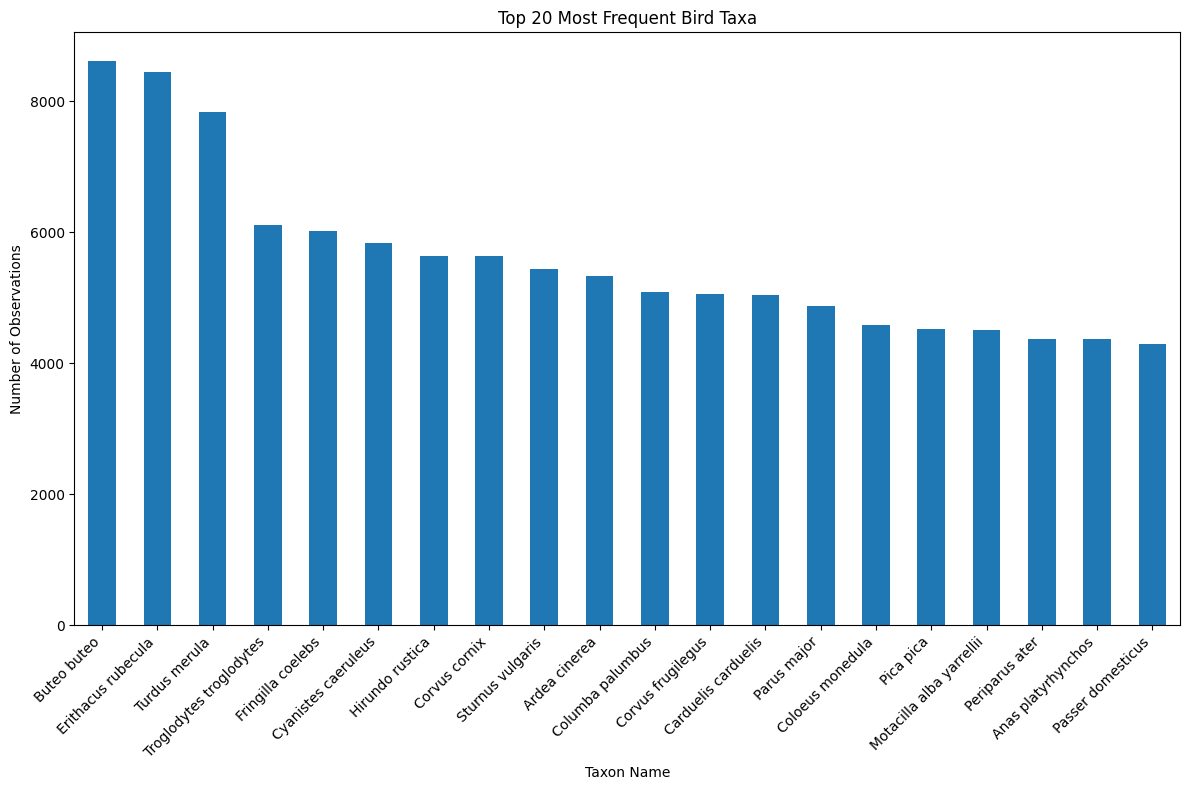

In [6]:
# Group by TaxonName and count occurrences, then sort in descending order
taxon_counts = birds['TaxonName'].value_counts().sort_values(ascending=False)

# Display the top 20 most frequent TaxonNames for clarity in the plot
display(taxon_counts.head(20))

# Create a bar plot of the top 20 most frequent TaxonNames
plt.figure(figsize=(12, 8))
taxon_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Bird Taxa')
plt.xlabel('Taxon Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As observed, Buteo buteo is the most frequently recorded bird species in Ireland, followed by Erithacus rubecula and Turdus merula. To gain more localized insights, we will now examine the distribution of these species within a specific county—Cork—as an example.


,count
TaxonName,
Buteo buteo,812
Erithacus rubecula,476
Turdus merula,439
Hirundo rustica,419
Ardea cinerea,378
Corvus cornix,365
Troglodytes troglodytes,348
Anas platyrhynchos,317
Falco tinnunculus,312


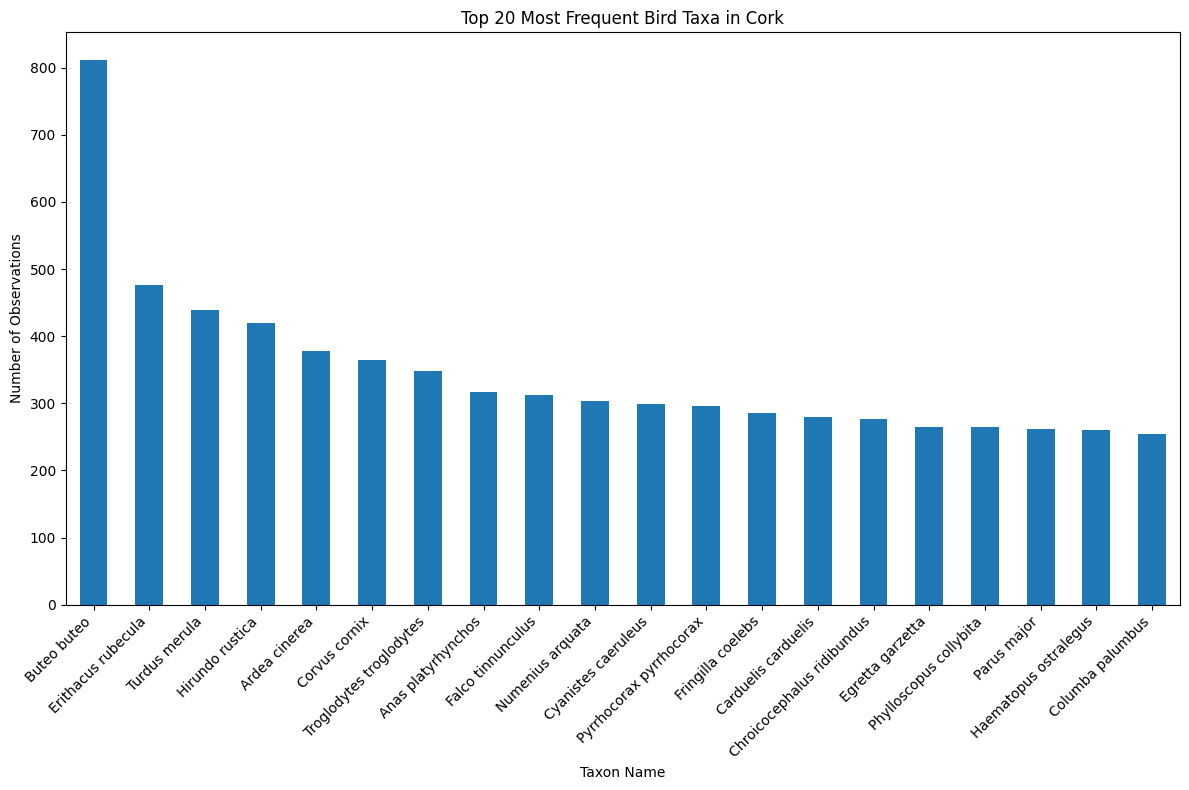

In [7]:
# Filter the DataFrame for observations in Cork
cork_birds = birds[birds['County'] == 'Cork'].copy()

# Group by TaxonName and count occurrences in Cork, then sort in descending order
cork_taxon_counts = cork_birds['TaxonName'].value_counts().sort_values(ascending=False)

# Display the top 20 most frequent TaxonNames in Cork
display(cork_taxon_counts.head(20))

# Create a bar plot of the top 20 most frequent TaxonNames in Cork
plt.figure(figsize=(12, 8))
cork_taxon_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Bird Taxa in Cork')
plt.xlabel('Taxon Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The following analysis focuses on the year 2024. Additional simulations and scenarios can be explored through the Tableau dashboard.


,count
TaxonName,
Buteo buteo,99
Erithacus rubecula,39
Turdus merula,38
Troglodytes troglodytes,28
Phylloscopus collybita,26
Fringilla coelebs,24
Falco tinnunculus,23
Cyanistes caeruleus,22
Corvus corax,22


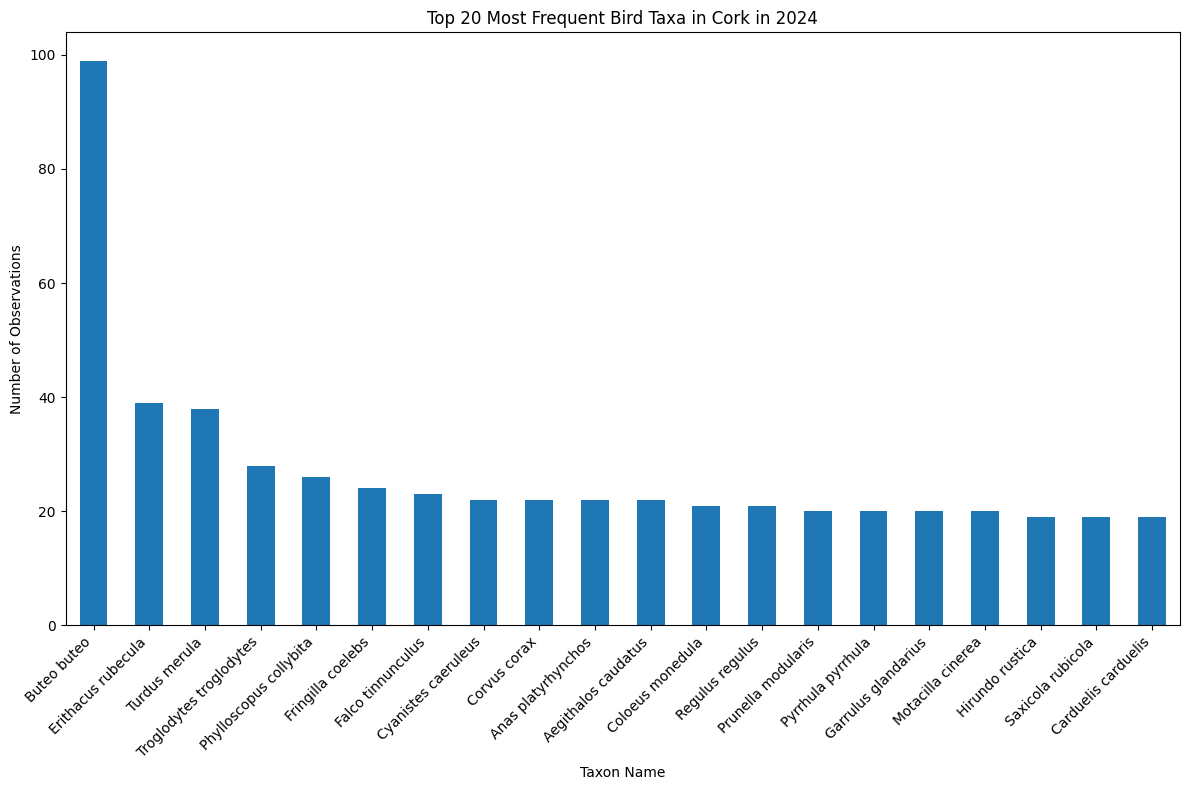

In [8]:
# Convert 'Date' column to datetime objects
birds['Date'] = pd.to_datetime(birds['Date'], format='%d/%m/%Y', errors='coerce')

# Filter the DataFrame for observations in Cork and in the year 2024
cork_birds_2024 = birds[(birds['County'] == 'Cork') & (birds['Date'].dt.year == 2024)].copy()

# Group by TaxonName and count occurrences in Cork in 2024, then sort in descending order
cork_taxon_counts_2024 = cork_birds_2024['TaxonName'].value_counts().sort_values(ascending=False)

# Display the top 20 most frequent TaxonNames in Cork in 2024
display(cork_taxon_counts_2024.head(20))

# Create a bar plot of the top 20 most frequent TaxonNames in Cork in 2024
plt.figure(figsize=(12, 8))
cork_taxon_counts_2024.head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Bird Taxa in Cork in 2024')
plt.xlabel('Taxon Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Let us now analyze the annual observation trends of Buteo buteo over the last 10 years.

,count
year,
2015,219
2016,354
2017,403
2018,1030
2019,1234
2020,1436
2021,1408
2022,631
2023,854


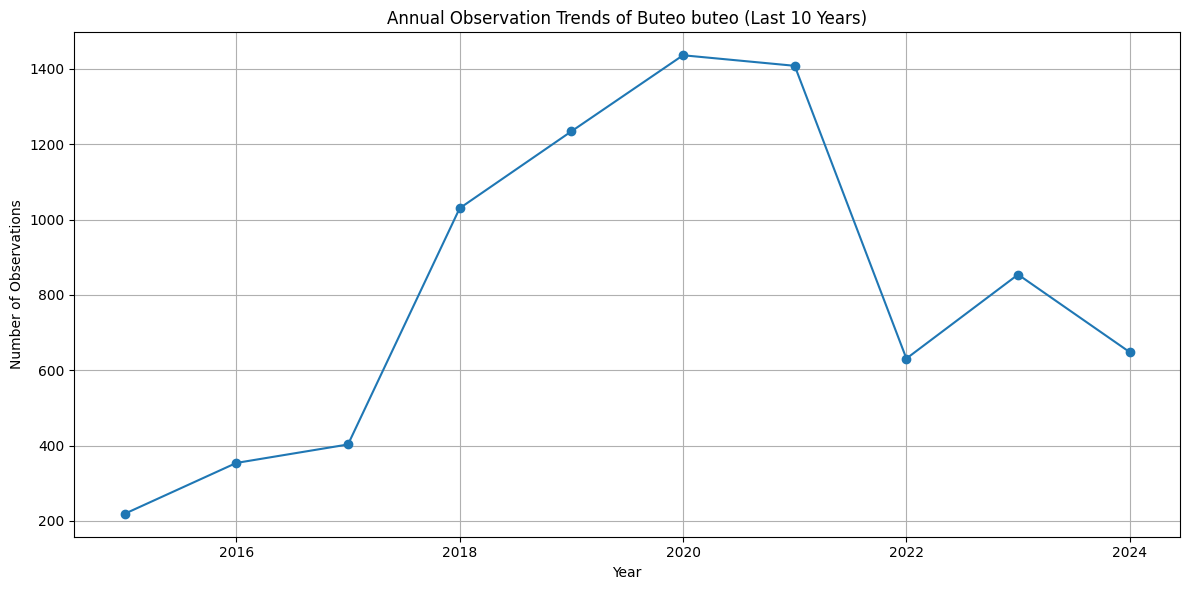

In [10]:
# Filter the DataFrame for 'Buteo buteo' observations
buteo_birds = birds[birds['TaxonName'] == 'Buteo buteo'].copy()

# Extract the year from the 'Date' column
buteo_birds['year'] = buteo_birds['Date'].dt.year

# Filter for the last 10 years of data
latest_year = buteo_birds['year'].max()
buteo_birds_last_10_years = buteo_birds[buteo_birds['year'] >= latest_year - 9]


# Group by year and count occurrences, then sort by year
buteo_annual_counts = buteo_birds_last_10_years['year'].value_counts().sort_index()

# Display the annual counts
display(buteo_annual_counts)

# Create a line plot of annual observations
plt.figure(figsize=(12, 6))
buteo_annual_counts.plot(kind='line', marker='o')
plt.title('Annual Observation Trends of Buteo buteo (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.tight_layout()
plt.show()

We will now analyze these trends on a monthly basis to identify seasonal patterns and variations in observations.

,count
month,
1,779
2,780
3,1319
4,1189
5,790
6,716
7,545
8,535
9,531


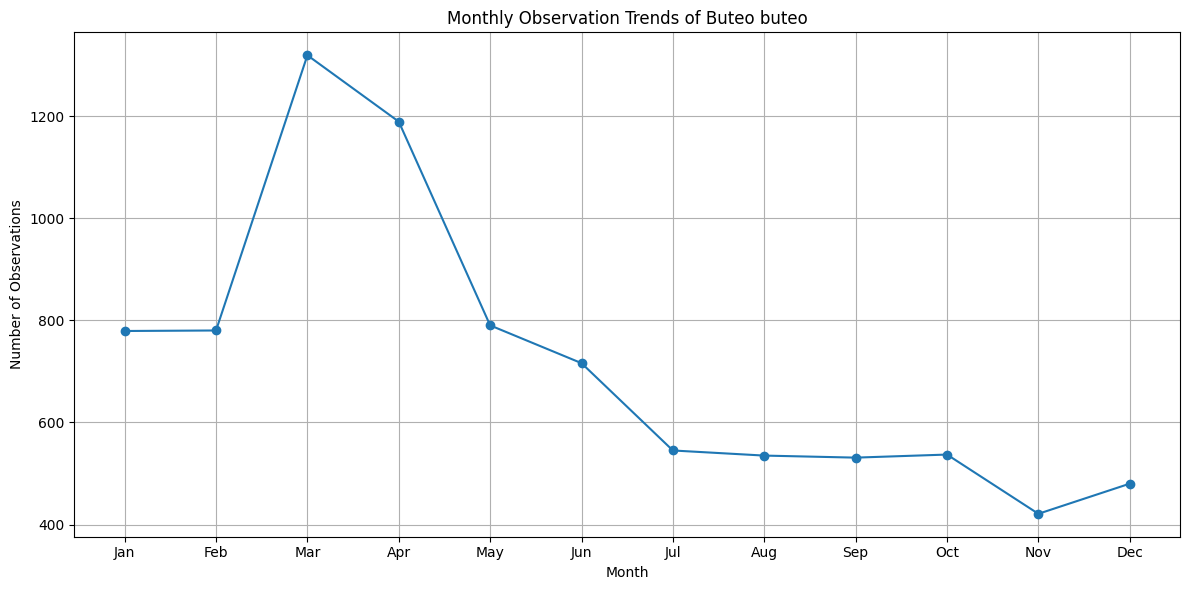

In [11]:
# Filter the DataFrame for 'Buteo buteo' observations
buteo_birds_monthly = birds[birds['TaxonName'] == 'Buteo buteo'].copy()

# Extract the month from the 'Date' column
buteo_birds_monthly['month'] = buteo_birds_monthly['Date'].dt.month

# Group by month and count occurrences, then sort by month
buteo_monthly_counts = buteo_birds_monthly['month'].value_counts().sort_index()

# Display the monthly counts
display(buteo_monthly_counts)

# Create a line plot of monthly observations
plt.figure(figsize=(12, 6))
buteo_monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly Observation Trends of Buteo buteo')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

To enhance our understanding of the monthly trends, we will visualize the data using a heatmap.

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,14.0,20.0,22.0,32.0,25.0,24.0,25.0,18.0,16.0,8.0,13.0,2.0
2016,20.0,37.0,49.0,54.0,45.0,33.0,20.0,21.0,16.0,24.0,18.0,17.0
2017,21.0,18.0,3.0,4.0,3.0,51.0,40.0,55.0,40.0,56.0,54.0,58.0
2018,200.0,122.0,119.0,90.0,92.0,65.0,62.0,68.0,60.0,67.0,42.0,43.0
2019,91.0,137.0,198.0,188.0,119.0,98.0,103.0,76.0,68.0,60.0,55.0,41.0
2020,18.0,51.0,213.0,266.0,184.0,145.0,107.0,86.0,96.0,111.0,66.0,93.0
2021,155.0,129.0,190.0,239.0,147.0,107.0,76.0,86.0,81.0,67.0,48.0,83.0
2022,1.0,4.0,212.0,11.0,54.0,83.0,40.0,35.0,41.0,49.0,37.0,64.0
2023,163.0,156.0,187.0,195.0,57.0,14.0,15.0,9.0,19.0,9.0,21.0,9.0


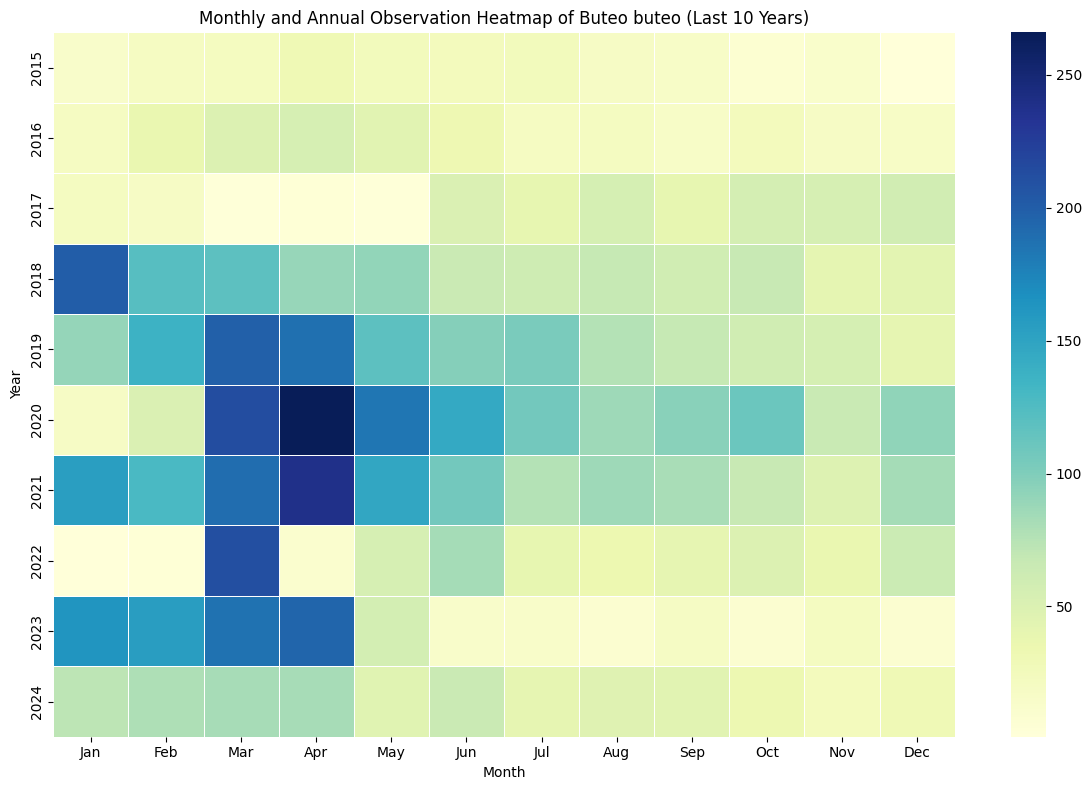

In [14]:
import seaborn as sns

# Filter the DataFrame for 'Buteo buteo' observations
buteo_birds_heatmap = birds[birds['TaxonName'] == 'Buteo buteo'].copy()

# Extract year and month
buteo_birds_heatmap['year'] = buteo_birds_heatmap['Date'].dt.year
buteo_birds_heatmap['month'] = buteo_birds_heatmap['Date'].dt.month

# Group by year and month and count occurrences
heatmap_data = buteo_birds_heatmap.groupby(['year', 'month']).size().unstack()

# Filter for the last 10 years of data
latest_year = buteo_birds_heatmap['year'].max()
heatmap_data_last_10_years = heatmap_data[heatmap_data.index >= latest_year - 9]

# Display the data for the heatmap
display(heatmap_data_last_10_years)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_last_10_years, cmap="YlGnBu", linewidths=.5)
plt.title('Monthly and Annual Observation Heatmap of Buteo buteo (Last 10 Years)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(np.arange(12) + .5, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

Identifying and examining missing data points.


In [16]:
birds.isna().sum()

,0
DateType,0
Date,33
TaxonVersionKey,0
TaxonName,0
GridReference,105270
East,0
North,0
Projection,0
Precision,0
SiteName,1


Missing County and Vice-county values are being filled by referencing valid entries from rows with matching SiteName identifiers.

In [17]:
# Fill missing 'County' values using the first non-null value within each SiteName group
birds['County'] = birds.groupby('SiteName')['County'].transform(lambda x: x.sort_index().bfill())

# Fill missing 'Vice-county' values using the first non-null value within each SiteName group
birds['Vice-county'] = birds.groupby('SiteName')['Vice-county'].transform(lambda x: x.sort_index().bfill())

# Display the null counts for 'County' and 'Vice-county' to verify
display(birds[['County', 'Vice-county']].isnull().sum())

/tmp/ipython-input-1582858241.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  birds['County'] = birds.groupby('SiteName')['County'].transform(lambda x: x.sort_index().bfill())
/tmp/ipython-input-1582858241.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  birds['Vice-county'] = birds.groupby('SiteName')['Vice-county'].transform(lambda x: x.sort_index().bfill())


,0
County,6234
Vice-county,237620


We have reduced the number of null values in the County and Vice-county fields. We will retain the remaining null records, as they include the geolocation of the observations, which may prove valuable for mapping purposes and could be refined further through more in-depth analysis.

Presenting the 33 records where the date field is null.

In [18]:
# Display rows where the 'Date' field is null
display(birds[birds['Date'].isnull()])

,DateType,Date,TaxonVersionKey,TaxonName,GridReference,East,North,Projection,Precision,SiteName,Record comment,Vice-county,County,Habitat description,Abundance,Common name,Type of sighting,Activity,latitude,longitude
2449,Y,NaT,NHMSYS0000530141,Alcedo atthis,NaN,-7.177259,53.284403,WGS84,100.0,Ballycon,along Philipstown River,NaN,Offaly,NaN,NaN,Common Kingfisher,NaN,NaN,53.284403,-7.177259
9071,Y,NaT,NHMSYS0000530358,Falco tinnunculus,L6550,65500.000000,250500.000000,OSI,1000.0,Clifden grainstore,Nest site,NaN,NaN,On building,Pair,Common Kestrel,NaN,NaN,53.487520,-10.027047
9072,Y,NaT,NHMSYS0000530358,Falco tinnunculus,M3521,135500.000000,221500.000000,OSI,1000.0,Ardfry,Nest site,NaN,Galway,On building,Pair,Common Kestrel,NaN,NaN,53.240223,-8.966805
9073,Y,NaT,NHMSYS0000530358,Falco tinnunculus,W4654,146500.000000,54500.000000,OSI,1000.0,Castlebernard,Nest site,NaN,NaN,On building,Pair,Common Kestrel,NaN,NaN,51.740876,-8.775236
9074,Y,NaT,NHMSYS0000530358,Falco tinnunculus,L9884,98500.000000,284500.000000,OSI,1000.0,Westport,Nest site,West Mayo,Mayo,In tree,Pair,Common Kestrel,NaN,NaN,53.800280,-9.541206
9382,Y,NaT,NHMSYS0000530358,Falco tinnunculus,M8708,187500.000000,208500.000000,OSI,1000.0,Derryhiveny,Nest site,NaN,NaN,On building,Pair,Common Kestrel,NaN,NaN,53.127186,-8.187464
9383,Y,NaT,NHMSYS0000530358,Falco tinnunculus,M3521,135500.000000,221500.000000,OSI,1000.0,Ardfry,Nest site,NaN,Galway,On building,Pair,Common Kestrel,NaN,NaN,53.240223,-8.966805
9384,Y,NaT,NHMSYS0000530358,Falco tinnunculus,R8292,182500.000000,192500.000000,OSI,1000.0,Coolbaun,Nest site,NaN,Cork,On building,Pair,Common Kestrel,NaN,NaN,52.983279,-8.261285
9385,Y,NaT,NHMSYS0000530358,Falco tinnunculus,R8298,182500.000000,198500.000000,OSI,1000.0,Drominagh,Nest site,NaN,Tipperary,On building,Pair,Common Kestrel,NaN,NaN,53.037192,-8.261610
9479,Y,NaT,NHMSYS0000530358,Falco tinnunculus,L6350,63500.000000,250500.000000,OSI,1000.0,Clifden castle,Nest site,NaN,NaN,On building,Pair,Common Kestrel,NaN,NaN,53.487006,-10.057157


In [19]:
# Count the number of rows for each unique value in the 'DateType' column
date_type_counts = birds['DateType'].value_counts()

# Display the counts
display(date_type_counts)

,count
DateType,
D,277945
Y,33
O,25


We observed that the null values in the date field correspond to entries containing only the year without a specific month. These records will be removed, as they do not align with the requirements of our project.

In [20]:
# Remove rows where the 'Date' field is null
birds.dropna(subset=['Date'], inplace=True)

# Verify that there are no more null values in the 'Date' column
display(birds['Date'].isnull().sum())

np.int64(0)

Identifying and examining missing data points.


In [21]:
birds.isna().sum()

,0
DateType,0
Date,0
TaxonVersionKey,0
TaxonName,0
GridReference,105268
East,0
North,0
Projection,0
Precision,0
SiteName,1


The dataset is sufficiently prepared for export to Tableau to enhance visualisation.

In [22]:
birds.to_csv('birds_processed.csv', index=False)